In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading  the historic data
historic_data = pd.read_csv("historic.csv")

In [4]:
print(historic_data.head())  # Displaying the first few rows of the dataset

   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top


In [5]:
# Check the data types and missing values
print(historic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB
None


In [6]:
# Summary statistics of numerical columns
print(historic_data.describe())




             item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000


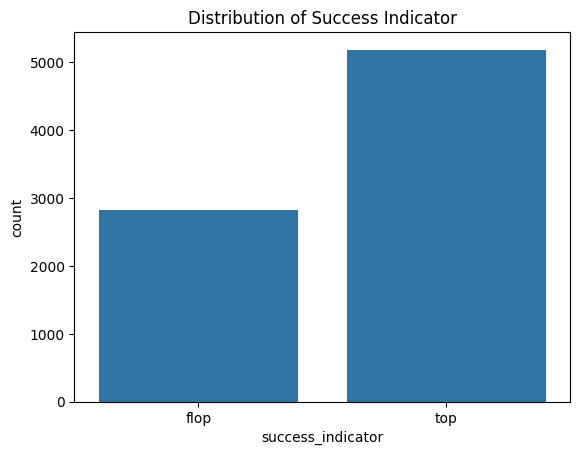

In [7]:
# Visualize the distribution of the target variable 'success_indicator'
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.show()


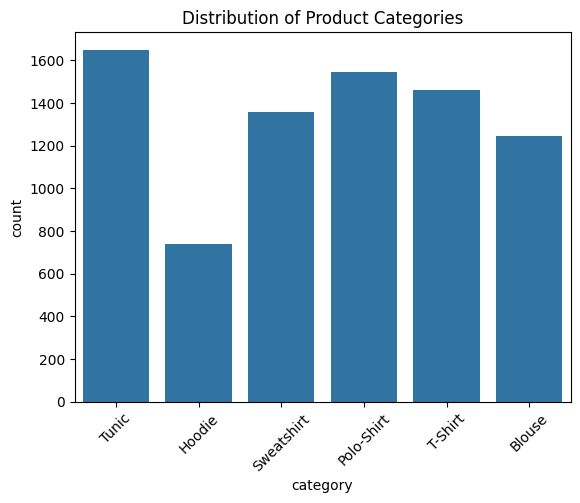

In [8]:
# Visualize the distribution of categorical variables
sns.countplot(x='category', data=historic_data)
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

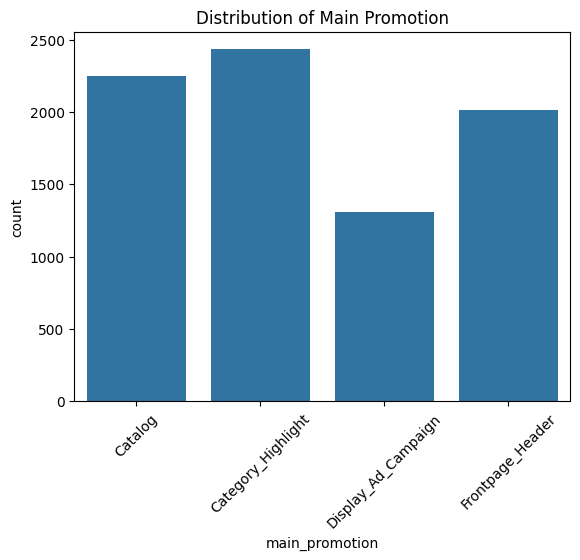

In [9]:
sns.countplot(x='main_promotion', data=historic_data)
plt.title('Distribution of Main Promotion')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Here, is the description of the above code:
#It loads the data, inspects its structure and quality, computes summary statistics, and creates visualizations to understand various aspects of the dataset.
#These visualizations include plots of the target variable distribution ('success_indicator'), categorical variable distributions ('category', 'main_promotion', 'color'), and a numerical vs. target variable relationship ('stars' vs. 'success_indicator').
#Additionally, a correlation heatmap is generated to explore relationships between numerical variables.



In [10]:
# Checking for null values
null_values = historic_data.isnull().sum()
print("Null Values:")
print(null_values)

# Checking for duplicate rows
duplicate_rows = historic_data.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Null Values:
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

Duplicate Rows: 0


In [12]:
#Analysis on : item_no feature

# Displaying the first few rows of the dataset
print(historic_data.head())

# Analysis on 'item_no' feature
# Step a: Check unique values of 'item_no'
unique_items = historic_data['item_no'].nunique()
print("\nNumber of unique items:", unique_items)

# Step b: Check for any missing values in 'item_no'
missing_items = historic_data['item_no'].isnull().sum()
print("Number of missing items:", missing_items)




   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top

Number of unique items: 8000
Number of missing items: 0


In [15]:
# Analysis on 'category' feature
# Step a: Check unique values of 'category'
unique_categories = historic_data['category'].unique()
print("\nUnique categories:", unique_categories)

# Step b: Check value counts of each category
category_counts = historic_data['category'].value_counts()
print("\nValue counts of each category:")
print(category_counts)


Unique categories: ['Tunic' 'Hoodie' 'Sweatshirt' 'Polo-Shirt' 'T-Shirt' 'Blouse']

Value counts of each category:
Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64


In [16]:
# Analysis on : main_promotion feature
# Step a: Check unique values of 'main_promotion'
unique_promotions = historic_data['main_promotion'].unique()
print("\nUnique main promotions:", unique_promotions)

# Step b: Check value counts of each main promotion
promotion_counts = historic_data['main_promotion'].value_counts()
print("\nValue counts of each main promotion:")
print(promotion_counts)


Unique main promotions: ['Catalog' 'Category_Highlight' 'Display_Ad_Campaign' 'Frontpage_Header']

Value counts of each main promotion:
Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64


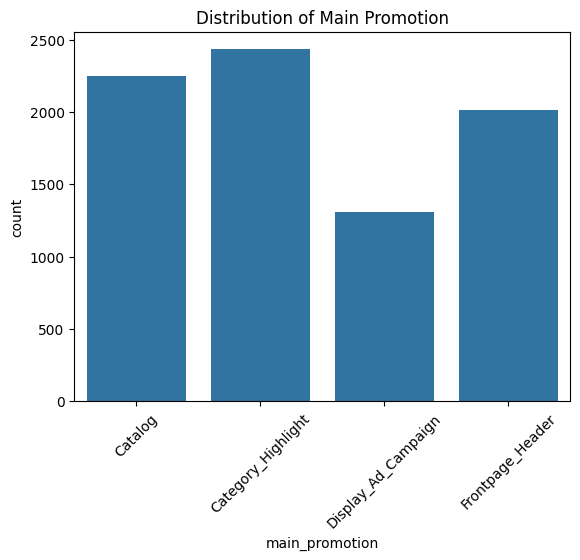

In [17]:
sns.countplot(x='main_promotion', data=historic_data)
plt.title('Distribution of Main Promotion')
plt.xticks(rotation=45)
plt.show()


Unique colors: ['Green' 'Red' 'Blue' 'Yellow' 'Black' 'White' 'Multi-Color' 'Brown'
 'Pink' 'Orange']

Value counts of each color:
Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64


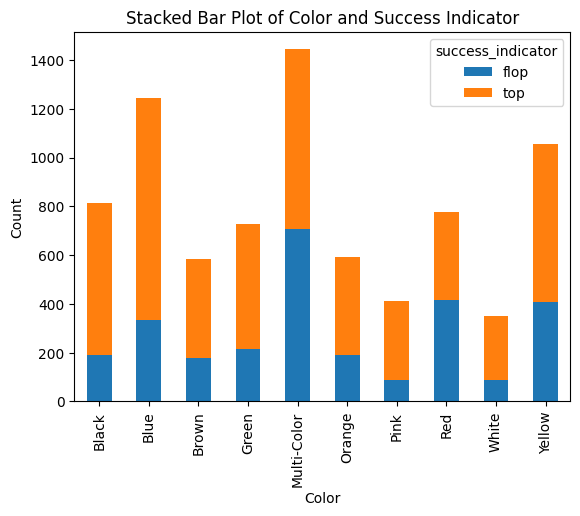

In [19]:
# Analysis on 'color' feature
# Step a: Check unique values of 'color'
unique_colors = historic_data['color'].unique()
print("\nUnique colors:", unique_colors)

# Step b: Check value counts of each color
color_counts = historic_data['color'].value_counts()
print("\nValue counts of each color:")
print(color_counts)

# Step c: Crosstab analysis of 'color' and 'success_indicator'
ct = pd.crosstab(historic_data['color'], historic_data['success_indicator'])

# Step d: Visualize stacked bar plot of 'color' and 'success_indicator'
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [21]:
# Analysis on :  stars feature
stars_summary = historic_data['stars'].describe()
print("\nSummary statistics of 'stars':")
print(stars_summary)


Summary statistics of 'stars':
count    8000.000000
mean        3.473075
std         0.978810
min         0.300000
25%         2.800000
50%         3.500000
75%         4.200000
max         6.100000
Name: stars, dtype: float64


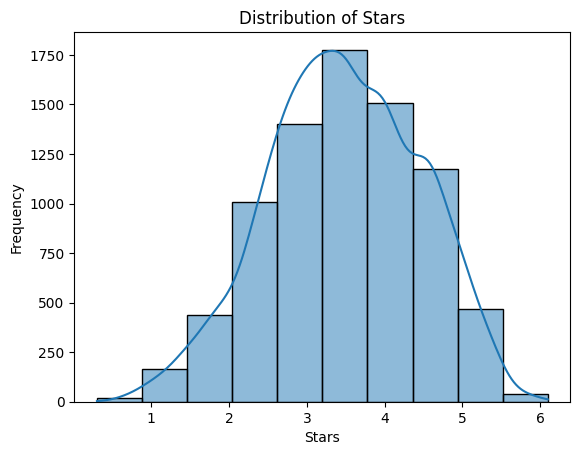

In [22]:
sns.histplot(historic_data['stars'], bins=10, kde=True)
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()

In [23]:
# Analysis on :  success_indicator feature
success_counts = historic_data['success_indicator'].value_counts()
print("\nValue counts of 'success_indicator':")
print(success_counts)


Value counts of 'success_indicator':
top     5185
flop    2815
Name: success_indicator, dtype: int64


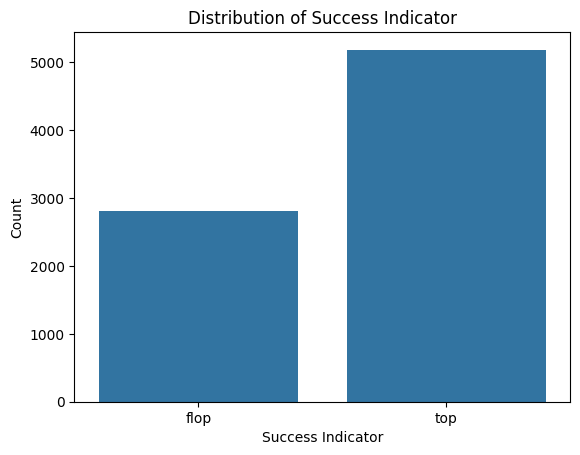

In [24]:
sns.countplot(x='success_indicator', data=historic_data)
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.title('Distribution of Success Indicator')
plt.show()

In [26]:
#Calculate the percentage of each success indicator category
success_percentage = historic_data['success_indicator'].value_counts(normalize=True) * 100
print("\nPercentage of each success indicator category:")
print(success_percentage)



Percentage of each success indicator category:
top     64.8125
flop    35.1875
Name: success_indicator, dtype: float64


In [28]:
# Check summary statistics of numerical features based on 'success_indicator'
success_top = historic_data[historic_data['success_indicator'] == 'TOP']
success_flop = historic_data[historic_data['success_indicator'] == 'FLOP']
print("\nSummary statistics of 'stars' for TOP success indicator:")
print(success_top['stars'].describe())

print("\nSummary statistics of 'stars' for FLOP success indicator:")
print(success_flop['stars'].describe())


Summary statistics of 'stars' for TOP success indicator:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: stars, dtype: float64

Summary statistics of 'stars' for FLOP success indicator:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: stars, dtype: float64


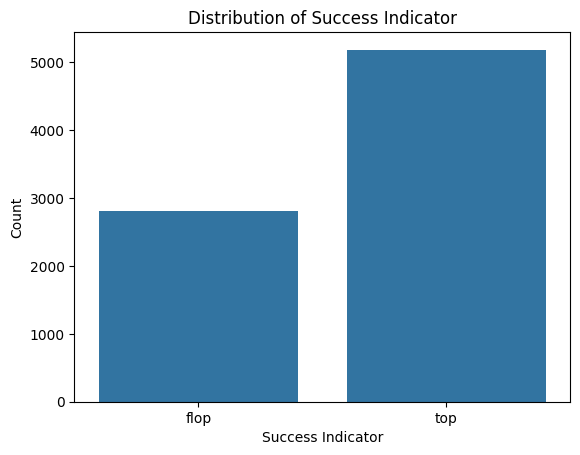

   item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top


In [35]:
# checking for Balancing and imbalancing of dataframe
success_counts = historic_data['success_indicator'].value_counts()
sns.countplot(x='success_indicator', data=historic_data)
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.title('Distribution of Success Indicator')
plt.show()
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the historic data
historic_data = pd.read_csv("historic.csv")

# Step 3: Display the first few rows of the dataset
print(historic_data.head())

# Step 4: Initialize LabelEncoder
encoder = LabelEncoder()

# Step 5: Transform 'success_indicator' feature
historic_data['success_indicator'] = encoder.fit_transform(historic_data['success_indicator'])




In [36]:
success_counts = historic_data['success_indicator'].value_counts()
print(success_counts)

1    5185
0    2815
Name: success_indicator, dtype: int64


In [37]:
print(historic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 375.1+ KB
None


In [38]:
# checking for Balancing and imbalancing of dataframe
success_percentage = success_counts / len(historic_data) * 100
print("\nPercentage of each success indicator category:")
print(success_percentage)


Percentage of each success indicator category:
1    64.8125
0    35.1875
Name: success_indicator, dtype: float64


In [46]:
# Drop the success indicator column
final_df = df_balanced.drop('success_indicator', axis=1)

#  Display the final DataFrame
print(final_df)


       item_no     stars  category_Blouse  category_Hoodie  \
0       739157  3.100000                0                0   
1       591846  1.500000                0                1   
2       337574  4.400000                0                0   
3       401933  3.100000                0                0   
4       812151  4.100000                0                1   
...        ...       ...              ...              ...   
10365   297562  3.943632                0                0   
10366   195599  1.652186                0                0   
10367   213064  2.277425                0                0   
10368   390671  2.089298                0                0   
10369   374485  2.815864                0                0   

       category_Polo-Shirt  category_Sweatshirt  category_T-Shirt  \
0                        0                    0                 0   
1                        0                    0                 0   
2                        0                    1 

In [ ]:
#In the Above EDA:
#I performed the following steps:
#Loaded the historic data.
#One-hot encoded categorical variables.
#Handled class imbalance using SMOTE oversampling technique.
#Concatenated the oversampled features and target variable to create a balanced dataset.
#Dropped the original success indicator column to create the final DataFrame for model training.